#1 Data preparation

In [1]:
%%shell
gdown -q 1VEG0qsiD5CZqyKSv5k6TceJbLOCt2yp7
echo 'download: done => file: animals.zip'
rm -rf ./animals/
unzip -q animals.zip
echo 'Data files in: /content/animals/'


download: done => file: animals.zip
Data files in: /content/animals/


#2 Samples

In [ ]:
import glob
import os

#list all files and directories in a folder; here, ./animals/
os.listdir('./animals/')

['meta.txt', 'chicken', 'cat', 'goose', 'dog', 'horse']

In [ ]:
#path is a file?
os.path.isfile('./animals/cat')

False

In [ ]:
#path is a directory?

os.path.isdir('./animals/cat')

True

In [ ]:
#path is a file?
os.path.isfile('./animals/meta.txt')

True

In [ ]:
#path is a directory?
os.path.isdir('./animals/meta.txt')

False

In [ ]:
# get file-size in bytes
os.path.getsize('./animals/cat/cat-1.jpg')

6828

In [ ]:
#list all files a given extension; here, *.jpg
files = glob.glob("./animals/cat/*.jpg")
files

['./animals/cat/cat-2.jpg',
 './animals/cat/cat-6.jpg',
 './animals/cat/cat-4.jpg',
 './animals/cat/cat-1.jpg']

In [ ]:
data_path = './animals'
class_path = 'dog'
file = 'dog-1.jpg'
path1 = os.path.join(data_path, class_path)
path2 = os.path.join(data_path, class_path, file)
print(path1)
print(path2)

./animals/dog
./animals/dog/dog-1.jpg


#3 Exercises

##Q.1

In [ ]:
"""
Fill code this cell to:
1. list all of classes (sub-folders of the folder sepecified in 'path_to_data')
2. assign variables 'classes' to contain the classes discovered in previous step.
"""

import glob
import os

path_to_data = './animals/'
classes: list
#YOUR CODE IS HERE
classes= [item for item in os.listdir(path_to_data) if os.path.isdir(os.path.join(path_to_data, item))]

classes = os.listdir(path_to_data)
classes = list(filter(lambda pt: os.path.isdir(os.path.join(path_to_data, pt)), classes))
#
classes

['goose', 'dog', 'horse', 'chicken', 'cat']

##Q.2

In [ ]:
"""
Fill code this cell to:
1. create a dictionary (named: class2counts)
  to map from classes (folders) to their number of data files stored the folders

NOTE: use comprehension instead of for-loop
"""

path_to_data = './animals/'
# YOUR CODE IS HERE, only 2-3 lines
counts = list(map(lambda x: len(os.listdir(os.path.join(path_to_data, x))), classes))

counts = [len(os.listdir(os.path.join(path_to_data, folder))) for folder in classes]
class2counts = dict(zip(classes, counts))
class2counts

{'goose': 3, 'dog': 7, 'horse': 5, 'chicken': 5, 'cat': 6}

##Q.3

In [ ]:
"""
Fill code this cell to:
1. list all files in the folder stored in variable "path_to_data"
2. store the returned filenames in a list named: files
3. make a report as shown in the output cell followed

NOTE: use comprehension if possible
"""
import functools as F

path_to_data = './animals/'

# YOUR CODE IS HERE, only 3-4 lines
classes = list(filter(lambda pt: os.path.isdir(os.path.join(path_to_data, pt)), os.listdir(path_to_data)))
files = F.reduce(lambda accL, item: accL + item, list(map(lambda x: glob.glob(os.path.join(path_to_data, x, '*')), classes)), [])


#classes = os.listdir(path_to_data)
#classes = list(filter(lambda pt: os.path.isdir(os.path.join(path_to_data, pt)), classes))

#files = [glob.glob(os.path.join(path_to_data, folder, '*')) for folder in classes]
#files = F.reduce(lambda accL, item: accL + item, files, [])

for file in files:
  print(file)


./animals/goose/g2.jpg
./animals/goose/g3.jpg
./animals/goose/g1.jpg
./animals/dog/dog-1.jpg
./animals/dog/dog-6.jpg
./animals/dog/dog-5.jpeg
./animals/dog/dog-2.jpg
./animals/dog/dog-7.jpg
./animals/dog/dog-3.jpg
./animals/dog/dog-4.jpeg
./animals/horse/horse-3.jpeg
./animals/horse/horse-2.jpg
./animals/horse/horse-4.jpg
./animals/horse/horse-1.jpg
./animals/horse/horse-5.jpg
./animals/chicken/c1.jpg
./animals/chicken/c3.jpg
./animals/chicken/c4.jpeg
./animals/chicken/c2.jpg
./animals/chicken/c5.jpg
./animals/cat/cat-4.jpg
./animals/cat/cat-5.jpeg
./animals/cat/cat-2.jpg
./animals/cat/cat-1.jpg
./animals/cat/cat-3.jpeg
./animals/cat/cat-6.jpg


##Q.4

In [ ]:
"""
Fill code this cell to:
1. list all files in the folder stored in variable "path_to_data"
2. create a dictionary to map each file to its label (class)
3. make a report as shown in the output cell followed

NOTE: use comprehension if possible
"""
import functools as F

path_to_data = './animals/'

# YOUR CODE IS HERE
classes = list(filter(lambda pt: os.path.isdir(os.path.join(path_to_data, pt)), os.listdir(path_to_data)))
files = F.reduce(lambda accL, item: accL + item, list(map(lambda x: glob.glob(os.path.join(path_to_data, x, '*')), classes)), [])
labels = F.reduce(lambda accL, item: accL + item, list(map(lambda x: [x]*len(glob.glob(os.path.join(path_to_data, x, '*'))), classes)), [])
'''
classes = os.listdir(path_to_data)
classes = list(filter(lambda pt: os.path.isdir(os.path.join(path_to_data, pt)), classes))

files = []
labels = []
for folder in classes:
  file_filter = os.path.join(path_to_data, folder, '*')
  c_files = glob.glob(file_filter)
  c_labels = [folder]*len(c_files)
  files.append(c_files)
  labels.append(c_labels)
files = F.reduce(lambda accL, item: accL + item, files, [])
labels = F.reduce(lambda accL, item: accL + item, labels, [])
'''
LK = dict(zip(files, labels))
LK


{'./animals/goose/g2.jpg': 'goose',
 './animals/goose/g3.jpg': 'goose',
 './animals/goose/g1.jpg': 'goose',
 './animals/dog/dog-1.jpg': 'dog',
 './animals/dog/dog-6.jpg': 'dog',
 './animals/dog/dog-5.jpeg': 'dog',
 './animals/dog/dog-2.jpg': 'dog',
 './animals/dog/dog-7.jpg': 'dog',
 './animals/dog/dog-3.jpg': 'dog',
 './animals/dog/dog-4.jpeg': 'dog',
 './animals/horse/horse-3.jpeg': 'horse',
 './animals/horse/horse-2.jpg': 'horse',
 './animals/horse/horse-4.jpg': 'horse',
 './animals/horse/horse-1.jpg': 'horse',
 './animals/horse/horse-5.jpg': 'horse',
 './animals/chicken/c1.jpg': 'chicken',
 './animals/chicken/c3.jpg': 'chicken',
 './animals/chicken/c4.jpeg': 'chicken',
 './animals/chicken/c2.jpg': 'chicken',
 './animals/chicken/c5.jpg': 'chicken',
 './animals/cat/cat-4.jpg': 'cat',
 './animals/cat/cat-5.jpeg': 'cat',
 './animals/cat/cat-2.jpg': 'cat',
 './animals/cat/cat-1.jpg': 'cat',
 './animals/cat/cat-3.jpeg': 'cat',
 './animals/cat/cat-6.jpg': 'cat'}

##Q.5


In [ ]:
"""
Fill code this cell to:
make a report as shown in the output cell followed

NOTE: use comprehension if possible
"""
import functools as F

path_to_data = './animals/'

# YOUR CODE IS HERE
classes = list(filter(lambda pt: os.path.isdir(os.path.join(path_to_data, pt)), os.listdir(path_to_data)))
files = F.reduce(lambda accL, item: accL + item, list(map(lambda x: glob.glob(os.path.join(path_to_data, x, '*')), classes)), [])
labels = F.reduce(lambda accL, item: accL + item, list(map(lambda x: [x]*len(glob.glob(os.path.join(path_to_data, x, '*'))), classes)), [])
sizes= list(map(lambda x: os.path.getsize(x), files))

'''
classes = os.listdir(path_to_data)
classes = list(filter(lambda pt: os.path.isdir(os.path.join(path_to_data, pt)), classes))

files = []
labels = []
sizes = []
for folder in classes:
  file_filter = os.path.join(path_to_data, folder, '*')
  c_files = glob.glob(file_filter)
  c_labels = [folder]*len(c_files)
  c_sizes = [os.path.getsize(file) for file in c_files]
  files.append(c_files)
  labels.append(c_labels)
  sizes.append(c_sizes)
files = F.reduce(lambda accL, item: accL + item, files, [])
labels = F.reduce(lambda accL, item: accL + item, labels, [])
sizes = F.reduce(lambda accL, item: accL + item, sizes, [])
'''

LK = dict(zip(files, labels))
LK2 = dict(zip(files, sizes))

header = "{:<40s}|{:>15s}|{:^20s}".format("File' name", "File's size", "File's label")
print('='*len(header))
print(header)
print('='*len(header))
for file in files:
  line = "{:<40s}|{:>15d}|{:^20s}".format(file, LK2[file], LK[file])
  print(line)
print('='*len(header))




File' name                              |    File's size|    File's label    
./animals/goose/g2.jpg                  |          10995|       goose        
./animals/goose/g3.jpg                  |           6240|       goose        
./animals/goose/g1.jpg                  |           7347|       goose        
./animals/dog/dog-1.jpg                 |           5936|        dog         
./animals/dog/dog-6.jpg                 |           8562|        dog         
./animals/dog/dog-5.jpeg                |           6091|        dog         
./animals/dog/dog-2.jpg                 |           5756|        dog         
./animals/dog/dog-7.jpg                 |           8409|        dog         
./animals/dog/dog-3.jpg                 |           7491|        dog         
./animals/dog/dog-4.jpeg                |           8469|        dog         
./animals/horse/horse-3.jpeg            |           5612|       horse        
./animals/horse/horse-2.jpg             |           9533|       

In [ ]:
"""
Fill code this cell to:
make a report as shown in the output cell followed

NOTE:
* Files MUST BE SORTED in file's label
* use comprehension if possible
"""
import functools as F

path_to_data = './animals/'

# YOUR CODE IS HERE
classes = list(filter(lambda pt: os.path.isdir(os.path.join(path_to_data, pt)), os.listdir(path_to_data)))
files = F.reduce(lambda accL, item: accL + item, list(map(lambda x: glob.glob(os.path.join(path_to_data, x, '*')), classes)), [])
labels = F.reduce(lambda accL, item: accL + item, list(map(lambda x: [x]*len(glob.glob(os.path.join(path_to_data, x, '*'))), classes)), [])
sizes= list(map(lambda x: os.path.getsize(x), files))

'''
classes = os.listdir(path_to_data)
classes = list(filter(lambda pt: os.path.isdir(os.path.join(path_to_data, pt)), classes))

files = []
labels = []
sizes = []
for folder in classes:
  file_filter = os.path.join(path_to_data, folder, '*')
  c_files = glob.glob(file_filter)
  c_labels = [folder]*len(c_files)
  c_sizes = [os.path.getsize(file) for file in c_files]
  files.append(c_files)
  labels.append(c_labels)
  sizes.append(c_sizes)
files = F.reduce(lambda accL, item: accL + item, files, [])
labels = F.reduce(lambda accL, item: accL + item, labels, [])
sizes = F.reduce(lambda accL, item: accL + item, sizes, [])
'''

LK = dict(zip(files, labels))
LK2 = dict(zip(files, sizes))

#files.sort(key=lambda file: LK2[file])
files.sort(key=lambda file: LK[file])

header = "{:<40s}|{:>15s}|{:^20s}".format("File' name", "File's size", "File's label")
print('='*len(header))
print(header)
print('='*len(header))
for file in files:
  line = "{:<40s}|{:>15d}|{:^20s}".format(file, LK2[file], LK[file])
  print(line)
print('='*len(header))




File' name                              |    File's size|    File's label    
./animals/cat/cat-4.jpg                 |           6444|        cat         
./animals/cat/cat-5.jpeg                |           8374|        cat         
./animals/cat/cat-2.jpg                 |           7784|        cat         
./animals/cat/cat-1.jpg                 |           6828|        cat         
./animals/cat/cat-3.jpeg                |           8725|        cat         
./animals/cat/cat-6.jpg                 |           4526|        cat         
./animals/chicken/c1.jpg                |          10598|      chicken       
./animals/chicken/c3.jpg                |          11038|      chicken       
./animals/chicken/c4.jpeg               |           4985|      chicken       
./animals/chicken/c2.jpg                |           5619|      chicken       
./animals/chicken/c5.jpg                |           6538|      chicken       
./animals/dog/dog-1.jpg                 |           5936|       

##Q.6

In [ ]:
"""
Fill code this cell to:
make a report as shown in the output cell followed

NOTE:
* Files MUST BE SORTED in file's size
* use comprehension if possible
"""
import functools as F

path_to_data = './animals/'

# YOUR CODE IS HERE
classes = list(filter(lambda pt: os.path.isdir(os.path.join(path_to_data, pt)), os.listdir(path_to_data)))
files = F.reduce(lambda accL, item: accL + item, list(map(lambda x: glob.glob(os.path.join(path_to_data, x, '*')), classes)), [])
labels = F.reduce(lambda accL, item: accL + item, list(map(lambda x: [x]*len(glob.glob(os.path.join(path_to_data, x, '*'))), classes)), [])
sizes= list(map(lambda x: os.path.getsize(x), files))

'''
classes = os.listdir(path_to_data)
classes = list(filter(lambda pt: os.path.isdir(os.path.join(path_to_data, pt)), classes))

files = []
labels = []
sizes = []
for folder in classes:
  file_filter = os.path.join(path_to_data, folder, '*')
  c_files = glob.glob(file_filter)
  c_labels = [folder]*len(c_files)
  c_sizes = [os.path.getsize(file) for file in c_files]
  files.append(c_files)
  labels.append(c_labels)
  sizes.append(c_sizes)
files = F.reduce(lambda accL, item: accL + item, files, [])
labels = F.reduce(lambda accL, item: accL + item, labels, [])
sizes = F.reduce(lambda accL, item: accL + item, sizes, [])
'''

LK = dict(zip(files, labels))
LK2 = dict(zip(files, sizes))

files.sort(key=lambda file: LK2[file])
#files.sort(key=lambda file: LK[file])

header = "{:<40s}|{:>15s}|{:^20s}".format("File' name", "File's size", "File's label")
print('='*len(header))
print(header)
print('='*len(header))
for file in files:
  line = "{:<40s}|{:>15d}|{:^20s}".format(file, LK2[file], LK[file])
  print(line)
print('='*len(header))




File' name                              |    File's size|    File's label    
./animals/cat/cat-6.jpg                 |           4526|        cat         
./animals/chicken/c4.jpeg               |           4985|      chicken       
./animals/horse/horse-3.jpeg            |           5612|       horse        
./animals/chicken/c2.jpg                |           5619|      chicken       
./animals/dog/dog-2.jpg                 |           5756|        dog         
./animals/horse/horse-4.jpg             |           5907|       horse        
./animals/dog/dog-1.jpg                 |           5936|        dog         
./animals/dog/dog-5.jpeg                |           6091|        dog         
./animals/goose/g3.jpg                  |           6240|       goose        
./animals/cat/cat-4.jpg                 |           6444|        cat         
./animals/chicken/c5.jpg                |           6538|      chicken       
./animals/horse/horse-5.jpg             |           6595|       

##Q.7

In [ ]:
"""
Fill code this cell to:
make a report as shown in the output cell followed

NOTE:
* Files MUST BE RE-ORDERED RAMDOMLY: use function 'random.sample'
* use comprehension if possible
"""
import functools as F
import random

path_to_data = './animals/'

# YOUR CODE IS HERE
classes = list(filter(lambda pt: os.path.isdir(os.path.join(path_to_data, pt)), os.listdir(path_to_data)))
files = F.reduce(lambda accL, item: accL + item, list(map(lambda x: glob.glob(os.path.join(path_to_data, x, '*')), classes)), [])
labels = F.reduce(lambda accL, item: accL + item, list(map(lambda x: [x]*len(glob.glob(os.path.join(path_to_data, x, '*'))), classes)), [])
sizes= list(map(lambda x: os.path.getsize(x), files))
'''
classes = os.listdir(path_to_data)
classes = list(filter(lambda pt: os.path.isdir(os.path.join(path_to_data, pt)), classes))

files = []
labels = []
sizes = []
for folder in classes:
  file_filter = os.path.join(path_to_data, folder, '*')
  c_files = glob.glob(file_filter)
  c_labels = [folder]*len(c_files)
  c_sizes = [os.path.getsize(file) for file in c_files]
  files.append(c_files)
  labels.append(c_labels)
  sizes.append(c_sizes)
files = F.reduce(lambda accL, item: accL + item, files, [])
labels = F.reduce(lambda accL, item: accL + item, labels, [])
sizes = F.reduce(lambda accL, item: accL + item, sizes, [])
'''
LK = dict(zip(files, labels))
LK2 = dict(zip(files, sizes))

files = random.sample(files, len(files))

header = "{:<40s}|{:>15s}|{:^20s}".format("File' name", "File's size", "File's label")
print('='*len(header))
print(header)
print('='*len(header))
for file in files:
  line = "{:<40s}|{:>15d}|{:^20s}".format(file, LK2[file], LK[file])
  print(line)
print('='*len(header))




File' name                              |    File's size|    File's label    
./animals/dog/dog-1.jpg                 |           5936|        dog         
./animals/dog/dog-2.jpg                 |           5756|        dog         
./animals/dog/dog-3.jpg                 |           7491|        dog         
./animals/cat/cat-6.jpg                 |           4526|        cat         
./animals/chicken/c5.jpg                |           6538|      chicken       
./animals/chicken/c4.jpeg               |           4985|      chicken       
./animals/horse/horse-2.jpg             |           9533|       horse        
./animals/goose/g1.jpg                  |           7347|       goose        
./animals/cat/cat-1.jpg                 |           6828|        cat         
./animals/chicken/c2.jpg                |           5619|      chicken       
./animals/dog/dog-4.jpeg                |           8469|        dog         
./animals/horse/horse-5.jpg             |           6595|       

##Q.8
The cell followed shows an example for reading and displaying image from a given file.

* Note: the figure's title is the label of the image

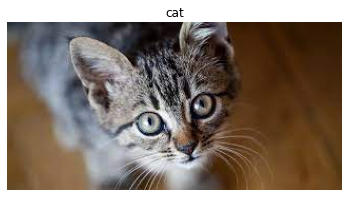

In [ ]:
import cv2
import matplotlib.pyplot as plt

filename = './animals/cat/cat-1.jpg'
label = 'cat'
image = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(image)
plt.axis('off')
plt.title(label)
plt.show()

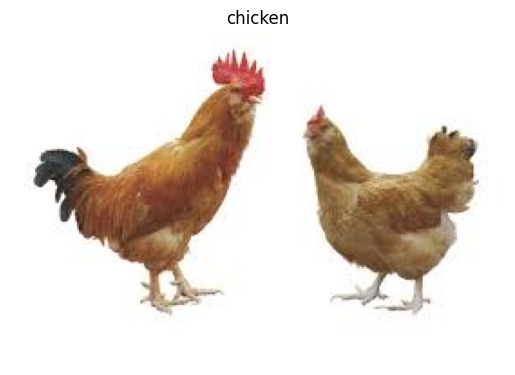

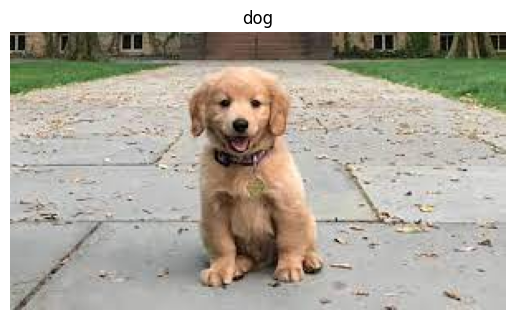

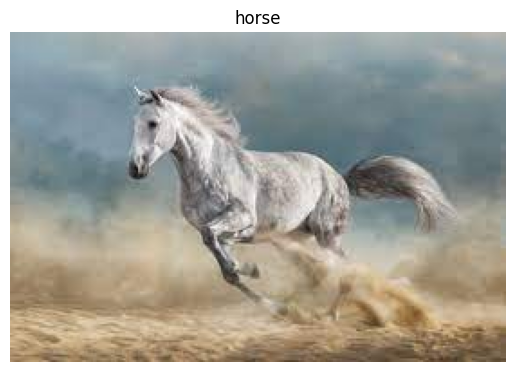

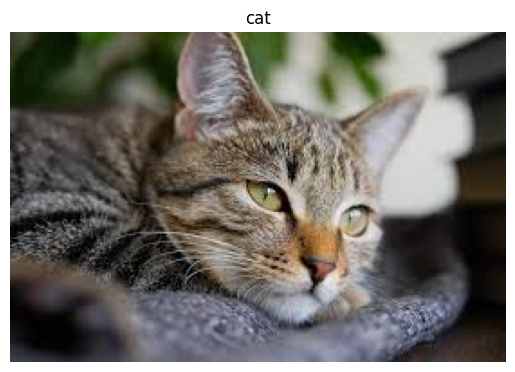

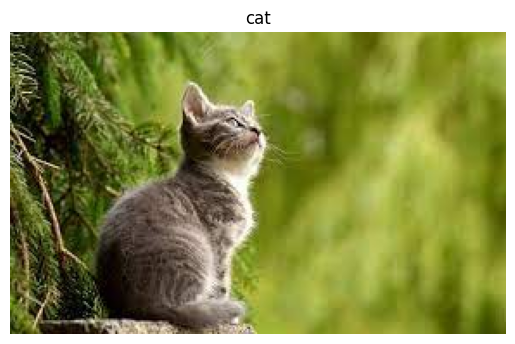

In [8]:
"""
Fill code this cell to:
1. Selecte 5 files randomly
2. Read and display them as shown in the output cell followed

NOTE:
* use comprehension if possible
"""
import os
import glob
import functools as F
import random
import cv2
import matplotlib.pyplot as plt

path_to_data = './animals/'

# YOUR CODE IS HERE
classes = list(filter(lambda pt: os.path.isdir(os.path.join(path_to_data, pt)), os.listdir(path_to_data)))
files = F.reduce(lambda accL, item: accL + item, list(map(lambda x: glob.glob(os.path.join(path_to_data, x, '*')), classes)), [])
labels = F.reduce(lambda accL, item: accL + item, list(map(lambda x: [x]*len(glob.glob(os.path.join(path_to_data, x, '*'))), classes)), [])
sizes= list(map(lambda x: os.path.getsize(x), files))
'''
classes = os.listdir(path_to_data)
classes = list(filter(lambda pt: os.path.isdir(os.path.join(path_to_data, pt)), classes))

files = []
labels = []
sizes = []
for folder in classes:
  file_filter = os.path.join(path_to_data, folder, '*')
  c_files = glob.glob(file_filter)
  c_labels = [folder]*len(c_files)
  c_sizes = [os.path.getsize(file) for file in c_files]
  files.append(c_files)
  labels.append(c_labels)
  sizes.append(c_sizes)
files = F.reduce(lambda accL, item: accL + item, files, [])
labels = F.reduce(lambda accL, item: accL + item, labels, [])
sizes = F.reduce(lambda accL, item: accL + item, sizes, [])
'''
LK = dict(zip(files, labels))
LK2 = dict(zip(files, sizes))

selected = random.sample(files, 5)
for file in selected:
  image = cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB)
  plt.figure()
  plt.imshow(image)
  plt.axis('off')
  plt.title(LK[file])
  plt.show()




#4 Define functions

***Define functions for each questions given above***

Already code above